- <font size = 6><b>Lec01. 딥러닝 기초

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import auc, mean_squared_error, mean_squared_log_error, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, label_binarize
from sklearn.linear_model import Ridge

from keras import models, layers, Sequential
from keras.layers import Dense, Activation
from keras.initializers import GlorotNormal

In [3]:
df = pd.read_csv('../ML/datasets/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# ML

## 점수 보기  : 4.81322

In [5]:
X = df.drop('MEDV', axis =1)
y = df['MEDV']
model = Ridge(alpha = 1.0,random_state=1)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

model.fit(X_train,y_train)
test_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, test_pred, squared=False)
print(f'rmse : {rmse:.5f}')

rmse : 4.81322


# DL

In [6]:
from keras.models import Sequential
from keras.layers import Dense

## seed 고정

In [7]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

## <b>Activation Function
* <b>활성화함수</b> ( ref : https://keras.io/api/layers/activations/)
    <pre>
    # from tensorflow.keras import activations as act
    # act.relu

    from keras import activations as act
    act.relu()
    act.sigmoid()
    act.softmax()
    act.tanh()</pre>

    - ReLu : 기울기 소실 문제 완화(역전파시 w 소실 문제를 완화) 
    - Sigmoid
    - Softmax
    - Tanh Function 

------    


## <b> Losses (loss function)
* ref : https://keras.io/api/losses/
    * <font color=blue>binary_crossentropy(원본값 둘중하나) : 0,1
    * <font color=blue>sparse_crossentropy(원본값 n중 하나) : 0 ~ 9         
    * <font color=blue>categorical_crossentropy(원핫인코딩) : 100000000 ~ 000000001  </font>
* <b>Aliases</b>
    * bce = BCE = binary_cross_entropy  
    * mse = MSE = mean_squared_error  
    * mae = MAE = mean_absolute_error  
    * mape = MAPE = mean_absolute_percentage_error  
    * msle = MSLE = mean_squared_logarithmic_error  
    * kld = KLD = kullback_leibler_divergence = kl_divergence  
    * logcosh = log_cosh  
    * huber_loss = huber
* Probabilistic losses
    * categorical_cross_entropy
    * binary_cross_entropy
    * sparse_categorical_cross_entropy
* Regression losses
    * mse,mae,rmse
* Hinge losses for "maximum-margin" classification
    * Hinge class ...

<pre>        
    from keras import losses as loss  
    loss.binary_crossentropy()  
    loss.categorical_crossentropy()  
    loss.sparse_categorical_crossentropy()  
    loss.cosine_similarity()  
    loss.mean_squared_error()  
    <font color=blue><b>
    loss.MSE  -- V  
    loss.mse  -- v  
    loss.mean_squared_error() --f  
    
        model.compile(loss="mean_squared_error")  
        model.compile(loss="mse")  
        model.compile(loss="MSE")  
        model.compile(loss=keras.losses.mean_squared_error())</b></font>
    
</pre>

## <b> Optimazer
*  https://keras.io/api/optimizers/
    * Gradient Descent
    * Statistic Gradient Descent
    * Momentum
    * AdaGrade
    * Adam
    * RmsProp
    
<pre>
    from keras import optimizers as opt  
    opt.Adam()  
    opt.Adadelta()  
    opt.Adagrad()  
    opt.Optimizer()  
    opt.RMSprop()  
    opt.SGD()  
    opt.TFOptimizer()
    
    from keras.optimizers import Adam  
    a = Adam(learning_rate=0.001, ... , name="Adam")  
    
    <font color=blue><b>
    model.compile(optimizer='adam')
    model.compile(optimizer=keras.optimizers,Adam(learning_rate=0.001)) 


## <b> metrics
* ref : https://keras.io/api/metrics/)
    * Probabilistic metrics : Crossentropy ...
    * Regression metrics : MeanSquaredError ... 
    * Hinge metrics for "maximum-margin" classification<br><br>
    * Accuracy metrics : Accuracy ...
    * Classification metrics based on True/False : AUC, Precision ...
    * Image segmentation metrics
    
<pre>
    from keras.metrics import Accuracy
    acc = Accuracy(name="accuracy", dtype=None)

    from keras.metrics import BinaryCrossentropy
    cr = BinaryCrossentropy(name="binary_crossentropy", ...)
    
    <font color=blue><b>
    model.compile(metrics=[keras.metrics.Accuracy()])
    model.compile(metrics=['accuracy'])

## 사용자 정의 metrics

In [8]:
import tensorflow as tf
from keras.optimizers import Adam  
from keras.losses import MeanSquaredError

# Annotation 어노테이션 : 실행할때 특수한 기호라고 알려주는 역할 ==================
@tf.function
def my_mse_def(y_true, y_pred):
    return -1 * keras.losses.MSE(y_true, y_pred)
# tf(tensor flow)에서 사용자 정의 함수 사용 가능함 ==============================

model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))

model.compile(loss=my_mse_def,
              optimizer=Adam(lr=0.001),
              metrics=[tf.keras.losses.MeanSquaredError()]) # metrics 여러개 사용 가능


## 모델 학습
- ref : https://neptune.ai/blog/keras-metrics

    
- <b><font size = 4> Model.fit( 
 <pre><b>
    x=None,  : 문제지
    y=None,  : 답안지
    batch_size=None,   : 역전파 횟수 (size 풀고 답 확인)
    --------------------------------------------------------------------------------------
    epochs= 1,               : 학습 반복 횟수 , 기본값 : 1
    initial_epoch=0,         : 학습 반복 횟수 시작 -> 거의 손대지 않음
    steps_per_epoch=None,    : sample 수 / batch_size -> batch_size의 그룹수(최대한 답을 맞출 수 있는 횟수)  
    -------------------------------------------------------------------------------------
    callbacks=None,    : ★
    
    ================================< validation >========================================
    -----------------------둘중에  하나 사용-----------------------------------------------
    validation_split=0.0,     : 0.2 하면 validation에 사용하는 데이터가 전체데이터*0.2
    validation_data=None,     : 미리 train_test_split한 데이터셋 직접 넣기 
    </b>
    -------------------------------------------------------------------------------------
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    -------------------------------------------------------------------------------------
    =====================================================================================


    shuffle=True,       : 섞을까 말까
    
    ---------------------- 가중치 --------------------------------------------------------
    class_weight=None,  : 가중치 조정 
    sample_weight=None,
    -------------------------------------------------------------------------------------
    
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    verbose="auto",    : 로그 관련
)




- <b>batch_size</b> : 역전파 횟수 
    - 해당 size 만큼 실행하면 중간에 답을 확인해 본 후 w 보정
    - batch_size 만큼 역전파가 일어난다
    - 장점 : 정답률이 올라간다 (틀렸는지 맞았는지 확인해보고 비슷한 유형이 나오면 정답을 맞출 확률이 올라감)
    - 단점 : 시간이 증가한다
    
- <b>epochs</b> : 이 문제를 몇번 반복해서 풀어볼지
    - epochs = 10 이면 같은 문제를 10번 풀어보는 느낌
    
- <b>step_per_epochs</b> : 클수록 정답률이 높아짐, 클수록 시간이 오래걸림
    - <font size = 4> $ \frac{samples 수}{batch size} $ </font> ->답 맞춰보는 횟수 
<br>    


In [9]:
# def recall(y_true, y_pred):
#     y_true = K.ones_like(y_true)
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

#     recall = true_positives / (all_positives + K.epsilon())
#     return recall

# def precision(y_true, y_pred):
#     y_true = K.ones_like(y_true)
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_score(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))


# model.compile(loss='categorical_cross_entropy',
#               optimizer=Adam(lr=0.001),
#               metrics=['accuracy',recall,precision, f1_score ])

# fit_history = model.fit(X_train,y_train, 
#                         validation_data = (X_test,y_test),
#                         epochs = 100,
#                         batch_size = 32  # batch_size : 기본 32 -> 32 row 하고 중간에 답을 확인해 봄  
#                         # step_per_epochs =  # samples수 / batch_size ->답 맞춰보는 횟수
#                        )

## Sequential
* from keras.models import Sequential
* from keras.layers import Dense

In [10]:
model = Sequential()
# 입력층 =====================================================================
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'))
# 은닉층 =====================================================================
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
# 출력층 =====================================================================
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse") #----------l o m

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 56)                784       
                                                                 
 dense_8 (Dense)             (None, 24)                1368      
                                                                 
 dense_9 (Dense)             (None, 26)                650       
                                                                 
 dense_10 (Dense)            (None, 12)                324       
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                

### hidden layer 확인

- 인덱스로 확인

In [12]:
model.layers[0].output

<KerasTensor: shape=(None, 56) dtype=float32 (created by layer 'dense_7')>

- 이름으로 확인

In [13]:
model.get_layer('dense_10').output

<KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'dense_10')>

- 입력층 확인

In [14]:
model.input

<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'dense_7_input')>

- 출력층 확인

In [15]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_13')>

---

- ref : https://keras.io/api/models/model/

In [16]:
from keras import Model
hidden_layer1_model = Model(inputs = model.input, outputs =model.layers[0].output)
output = hidden_layer1_model(X_train.values)


print(f'input : {X_train[:1]}')
print(f'output : {output[:1]}')
print(f'hidden_layer1_model weight의 (피쳐갯수,weight갯수) : {hidden_layer1_model.get_weights()[0].shape}')
print(f'hidden_layer1_model weight : {hidden_layer1_model.get_weights()}')


input :       CRIM   ZN  INDUS  CHAS    NOX     RM  AGE     DIS  RAD    TAX  PTRATIO  \
42  0.1415  0.0   6.91   0.0  0.448  6.169  6.6  5.7209  3.0  233.0     17.9   

         B  LSTAT  
42  383.37   5.81  
output : [[ 89.035934  14.681082  67.65521    0.         0.        92.32366
   64.533844   0.         0.       127.41639    0.        58.860233
   71.52345    0.        21.223928 147.23042   68.11703    0.
  120.36875    0.        15.251628  72.487434   0.        56.307774
  112.20273    0.        53.10632    0.         8.976669  53.98573
    0.         0.         0.         0.        38.669342  41.02069
    0.       120.23482  153.13158    0.         0.        17.726324
   86.22569   30.936403  33.326317 116.4024     0.        25.723976
    0.         0.        94.535545   0.        39.012253  65.14837
    0.        45.310287]]
hidden_layer1_model weight의 (피쳐갯수,weight갯수) : (13, 56)
hidden_layer1_model weight : [array([[-0.03132659, -0.24901633, -0.06651428, -0.17386478, -0.104241

- weight 맘대로 설정하기

In [17]:
# new_weight = [ 9.99999999e-01, -1.40592277e-01,  1.96293175e-01,
#         -1.26547515e-02, -1.11576855e-01, -2.77784705e-01,
#         -2.37955391e-01, -2.12220252e-02,  1.73814982e-01,
#          4.74910736e-02, -1.74369991e-01, -1.26801014e-01,
#         -2.51080930e-01, -3.48809659e-02, -1.90209463e-01,
#          1.17227763e-01, -6.88039362e-02, -1.63407564e-01,
#         -8.91854465e-02,  4.42517996e-02, -1.00297064e-01,
#          9.86557603e-02, -2.09857225e-02,  2.39671826e-01,
#         -1.36857837e-01,  3.90099585e-02, -2.09466219e-01,
#          1.11805409e-01, -1.01331830e-01, -1.06357485e-01,
#         -1.06247038e-01, -1.77567899e-02,  1.99335009e-01,
#          1.84968024e-01,  1.70239091e-01, -2.86419392e-02,
#          2.84145415e-01,  1.00215375e-02, -2.40780145e-01,
#          2.71232545e-01,  1.22726560e-02,  2.25559950e-01,
#         -1.57906264e-01, -1.17767558e-01, -2.61305630e-01,
#          7.95602798e-03,  1.26511693e-01, -2.27912575e-01,
#          1.29556924e-01, -2.38643885e-02,  1.24223232e-02,
#          9.45016742e-02, -1.73441947e-01, -8.33374709e-02,
#          2.70990312e-01,  2.72698045e-01]
# model.set_weights(new_weight)

- layer[0]의 weight값을 histplot그림

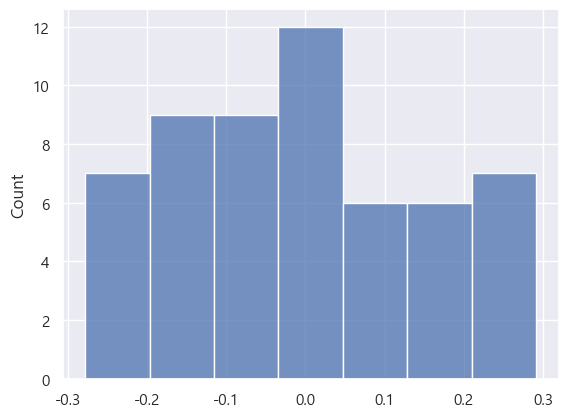

In [18]:
sns.histplot([ 2.90980041e-01, -1.40592277e-01,  1.96293175e-01,
        -1.26547515e-02, -1.11576855e-01, -2.77784705e-01,
        -2.37955391e-01, -2.12220252e-02,  1.73814982e-01,
         4.74910736e-02, -1.74369991e-01, -1.26801014e-01,
        -2.51080930e-01, -3.48809659e-02, -1.90209463e-01,
         1.17227763e-01, -6.88039362e-02, -1.63407564e-01,
        -8.91854465e-02,  4.42517996e-02, -1.00297064e-01,
         9.86557603e-02, -2.09857225e-02,  2.39671826e-01,
        -1.36857837e-01,  3.90099585e-02, -2.09466219e-01,
         1.11805409e-01, -1.01331830e-01, -1.06357485e-01,
        -1.06247038e-01, -1.77567899e-02,  1.99335009e-01,
         1.84968024e-01,  1.70239091e-01, -2.86419392e-02,
         2.84145415e-01,  1.00215375e-02, -2.40780145e-01,
         2.71232545e-01,  1.22726560e-02,  2.25559950e-01,
        -1.57906264e-01, -1.17767558e-01, -2.61305630e-01,
         7.95602798e-03,  1.26511693e-01, -2.27912575e-01,
         1.29556924e-01, -2.38643885e-02,  1.24223232e-02,
         9.45016742e-02, -1.73441947e-01, -8.33374709e-02,
         2.70990312e-01,  2.72698045e-01])
plt.show()

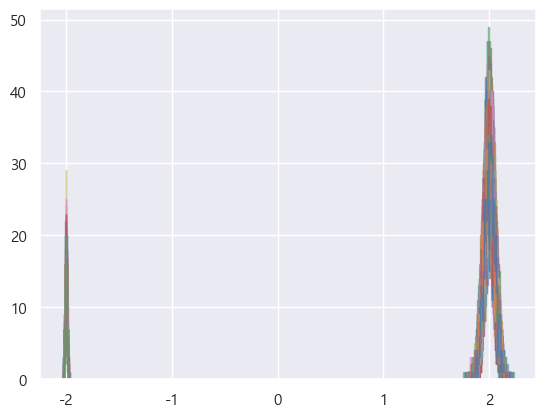

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomNormal(mean=2.0, stddev=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomNormal(mean=-2.0, stddev=0.01, seed=None)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

weights = model.get_weights()
# print(weights)

plt.hist(weights[0], bins=100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins=100, alpha=0.7, histtype='step')
plt.show()

### 배치정규화
- ref : https://keras.io/ko/initializers/

- model.add(Dense(units=10, input_dim=4, activation='relu',<font color =red><b> kernel_initializer='glorot_normal'</b></font>))

* <b>Xavier 배치 정규화</b>
    <pre>
    keras.initializers.<b>glorot_normal(seed=None)</b>
    stddev = 1 / sqrt(fan_in)
    sigmoid

* <b>HE 배치 정규화</b>
    <pre>
    keras.initializers.<b>he_normal(seed=None)</b>
    stddev = sqrt(2 / fan_in)
    relu

## tf.keras.initializers.RandomNormal 사용하기
* mean=2.0  , stddev=0.05   ,  mean=-2.0, stddev=0.01
* mean=-0.05, stddev=0.05 ,  mean=-0.1, stddev=0.1

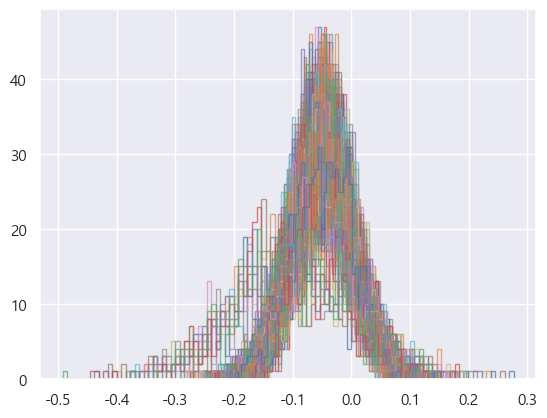

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomNormal(mean=-0.05, stddev=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomNormal(mean=-0.1, stddev=0.1, seed=None)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

weights = model.get_weights()
# print(weights)

plt.hist(weights[0], bins=100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins=100, alpha=0.7, histtype='step')
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'
               , kernel_initializer='glorot_normal'  #--  Xavier:1/root(N)
               ))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse")


### 모델/가중치 저장&불러오기
* save() : 모델구조 + 보정된weights
    * 바로사용 가능
    * 저장 용량이 크다
* save_weights() : 보정된weights
    * 저장 용량이 적다
    * 모델 구조를 알아야 사용 가능

#### 모델
* model.save("aaa.h5")
* re_model = load_model("aaa.h5")

In [ ]:
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [ ]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'
               , kernel_initializer='glorot_normal'  #--  Xavier:1/root(N)
               ))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse")

In [ ]:
from keras.models import load_model
model.fit(X_train, y_train)
model.evaluate(X_test, y_test) 
model.save("./lec02_my_model.h5")
model.save_weights("./lec02_my_weight")

2/2 [==============================] - 0s 4ms/step - loss: 617.0695 - mse: 617.0695


In [ ]:
re_model = load_model("./lec02_my_model.h5")
re_model.evaluate(X_test, y_test) 

2/2 [==============================] - 0s 4ms/step - loss: 617.0695 - mse: 617.0695


[617.0694580078125, 617.0694580078125]

#### 가중치
* model.save_weights("my_weight")
* re_weights = load_weights("my_weight")
* model.set_weights(re_weights)

In [ ]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'
               , kernel_initializer='glorot_normal'  #--  Xavier:1/root(N)
               ))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse")

model.load_weights("./lec02_my_weight")
model.evaluate(X_test, y_test) 

2/2 [==============================] - 0s 3ms/step - loss: 617.0695 - mse: 617.0695


[617.0694580078125, 617.0694580078125]

## fit()

In [22]:
y = df['MEDV']
X = df.drop('MEDV',axis = 1)

### case 1 전체를 넣은 경우
- batch_size = 50(약 9회 : w 보정 횟수가 적음)
- epochs =10(반복 학습이 다소 적은 경우)
- X,y 통째로 넣고 train 점수만 본 경우
- 오버피팅 확인 불가

In [ ]:
model = load_model("./lec02_my_model.h5")
model.fit(x=X,y=y, batch_size=50,epochs=10,steps_per_epoch=455/50)
print(model.evaluate(X_test, y_test) )

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 665.7270 - mse: 665.7270
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 598.4713 - mse: 598.4713
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 608.8033 - mse: 608.8033
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 590.8057 - mse: 590.8057
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 586.4759 - mse: 586.4759
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 601.9960 - mse: 601.9960
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 564.2925 - mse: 564.2925
Epoch 8/10
9/9 [==============================] - 0s 3ms/step - loss: 612.1128 - mse: 612.1127
Epoch 9/10
9/9 [==============================] - 0s 3ms/step - loss: 598.4468 - mse: 598.4468
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 492.0579 - mse: 492.0579
[492.0578918457031, 492.0578918457031]


### case 2 train, validation
- X,y 통째로 넣고 test_size = 0.1로 주고  test 데이터로 검증
- 오버피팅 확인o  -> 어느정도 일반화 학습

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1234)
# model.fit(x=X_train,y=y_train
#           ,validation_data=(X_test, y_test) 
#           , batch_size=50,epochs=10,steps_per_epoch=455/50)

train_test_split(X,y , test_size = 0.2, random_state=1234)
model = load_model("./lec02_my_model.h5")
model.fit(x=X,y=y,validation_split=0.2 , batch_size=50,epochs=10,steps_per_epoch=455/50)
print(model.evaluate(X_test, y_test) )

Epoch 1/10
9/9 [==============================] - 1s 25ms/step - loss: 738.4346 - mse: 738.4346 - val_loss: 340.1776 - val_mse: 340.1776
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 688.7539 - mse: 688.7539 - val_loss: 302.3004 - val_mse: 302.3004
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 679.9000 - mse: 679.9000 - val_loss: 293.8078 - val_mse: 293.8078
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 648.5778 - mse: 648.5778 - val_loss: 291.5706 - val_mse: 291.5706
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 665.6951 - mse: 665.6951 - val_loss: 290.4109 - val_mse: 290.4109
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 667.6456 - mse: 667.6456 - val_loss: 289.5651 - val_mse: 289.5651
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 668.3496 - mse: 668.3496 - val_loss: 288.8632 - val_mse: 288.8632
Epoch 8/10
9/9 [==============================

### case 3 train,validation -> batch_size, epochs
* X,y 통째로 넣고 train 점수만 보는 경우
- batch_size = 5(50보다 작음 == 자주 답을 확인한다 == w보정이 빈번하다 == loss 작아진다)
- epochs = 50 (10보다 크다 == 1문제를 5배 더 학습한다)
- 오버피팅 발생 우려 o

In [26]:
model.fit(X,y,validation_split=0.2, epochs=50, batch_size = 5, steps_per_epoch=455/5)

Epoch 1/50
91/91 [==============================] - 0s 4ms/step - loss: 73.4676 - mse: 73.4676 - val_loss: 32.4880 - val_mse: 32.4880
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 77.3411 - mse: 77.3411 - val_loss: 88.2793 - val_mse: 88.2793
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 58.8702 - mse: 58.8702 - val_loss: 16.3167 - val_mse: 16.3167
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 62.8278 - mse: 62.8278 - val_loss: 16.8659 - val_mse: 16.8659
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 63.7896 - mse: 63.7896 - val_loss: 21.6874 - val_mse: 21.6874
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 57.3621 - mse: 57.3621 - val_loss: 32.1007 - val_mse: 32.1007
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 47.2361 - mse: 47.2361 - val_loss: 38.8004 - val_mse: 38.8004
Epoch 8/50
91/91 [==============================] - 0s 2ms/ste

### case 4 learning_rate 
- learning_rate -> default : 0.001

#### learning_rate = 0.1 (증가)
- loss : 발산한다

In [27]:
from keras.optimizers import Adam

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.1), metrics="mse")
model.fit(X,y,validation_split=0.2, epochs=50, batch_size = 5, steps_per_epoch=455/5)

Epoch 1/50
91/91 [==============================] - 1s 4ms/step - loss: 807.5339 - mse: 807.5339 - val_loss: 140.0554 - val_mse: 140.0554
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 339.4188 - mse: 339.4188 - val_loss: 47.2907 - val_mse: 47.2907
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 191.5817 - mse: 191.5817 - val_loss: 27.0186 - val_mse: 27.0186
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 117.8473 - mse: 117.8473 - val_loss: 39.2827 - val_mse: 39.2827
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 98.3723 - mse: 98.3723 - val_loss: 58.6702 - val_mse: 58.6702
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 82.8972 - mse: 82.8972 - val_loss: 76.4256 - val_mse: 76.4256
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 88.9649 - mse: 88.9649 - val_loss: 84.8694 - val_mse: 84.8694
Epoch 8/50
91/91 [==============================] - 

#### learning_rate = 0.00001 (감소)
- loss : 0에 수렴하지 못함

In [28]:
from keras.optimizers import Adam

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001), metrics="mse")
fit_history = model.fit(X,y,validation_split=0.2, epochs=50, batch_size = 5, steps_per_epoch=455/5)

Epoch 1/50
91/91 [==============================] - 1s 4ms/step - loss: 85.4968 - mse: 85.4968 - val_loss: 99.7511 - val_mse: 99.7511
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 93.1409 - mse: 93.1409 - val_loss: 99.7494 - val_mse: 99.7494
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 81.6161 - mse: 81.6161 - val_loss: 99.7487 - val_mse: 99.7487
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 85.0951 - mse: 85.0951 - val_loss: 99.7458 - val_mse: 99.7458
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 86.1984 - mse: 86.1984 - val_loss: 99.7440 - val_mse: 99.7440
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 79.0452 - mse: 79.0452 - val_loss: 99.7432 - val_mse: 99.7432
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 88.4411 - mse: 88.4411 - val_loss: 99.7416 - val_mse: 99.7416
Epoch 8/50
91/91 [==============================] - 0s 2ms/ste

## evaluate()

In [29]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 102.7606 - mse: 102.7606


[102.76055908203125, 102.76055908203125]

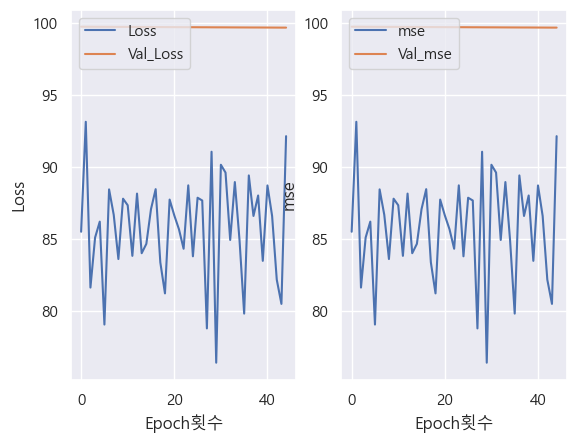

<Figure size 640x480 with 0 Axes>

In [30]:
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_history.history['loss'])
ax1.plot(fit_history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch횟수')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_history.history['mse'])
ax2.plot(fit_history.history['val_mse'])
plt.ylabel('mse')
plt.xlabel('Epoch횟수')
plt.legend(['mse', 'Val_mse'], loc='upper left')
plt.show()

plt.tight_layout()
plt.show()

## predict()

In [31]:
pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [32]:
y_test.shape, pred.shape

((102,), (102, 1))

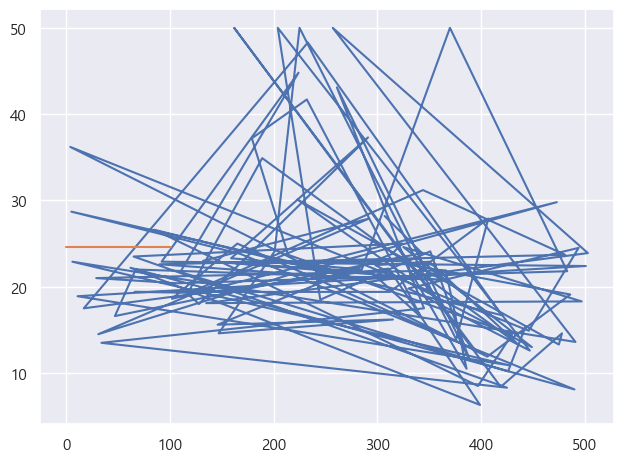

In [33]:

plt.plot(y_test)
plt.plot(pred)


plt.tight_layout()
plt.show()